# Predictive Maintenance 

Deep Learning algorithm Long-Short-Term-Memory (LSTM) with Feedforward Neural Network (FNN) to predict machine Remaining Useful Life (RUL) using the NASA turbofan engine degradation dataset C-MAPSS (Commercial Modular Aero-Propulsion System Simulation). 

## Imports :

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from dataPreprocessing import *
from plottingData import *
from sklearn.metrics import mean_absolute_error

## Load & Plot the Data :

In [2]:
(train_data, train_RUL), (test_data, test_RUL) = load_FD_data(1)

In [3]:
#Show the first five rows of the training set
train_data

,unit,cycle,Setting1,Setting2,Setting3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPres,...,FuelFlowRatio,CorrFanSpeed,CorrCoreSpeed,BypassRatio,BurnerFuelAirRatio,BleedEnthalpy,DemandFanSpeed,DemandCorrFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [4]:
#Show the first five rows of the testing set
test_data

,unit,cycle,Setting1,Setting2,Setting3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPres,...,FuelFlowRatio,CorrFanSpeed,CorrCoreSpeed,BypassRatio,BurnerFuelAirRatio,BleedEnthalpy,DemandFanSpeed,DemandCorrFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


## Normalize the Data :

In [5]:
#Normalize the training data and return the mean and the standard deviation to use them to normalize the testing 
train_data_normalized,test_data_normalized = normalizeData(train_data,test_data)

In [6]:
# Show the normalized Data
train_data_normalized.head()

,unit,cycle,Setting1,Setting2,Setting3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPres,...,FuelFlowRatio,CorrFanSpeed,CorrCoreSpeed,BypassRatio,BurnerFuelAirRatio,BleedEnthalpy,DemandFanSpeed,DemandCorrFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,-1.565132,-0.315972,-1.372920,0.0,0.999976,-1.721684,-0.134252,-0.925914,0.999976,...,0.334254,-1.058865,-0.269065,-0.603801,0.999976,-0.781691,0.0,0.0,1.348460,1.194398
1,1,-1.550614,0.872701,-1.031695,0.0,0.999976,-1.061754,0.211523,-0.643710,0.999976,...,1.174871,-0.363637,-0.642829,-0.275845,0.999976,-0.781691,0.0,0.0,1.016503,1.236892
2,1,-1.536097,-1.961827,1.015652,0.0,0.999976,-0.661797,-0.413156,-0.525940,0.999976,...,1.364688,-0.919819,-0.551616,-0.649128,0.999976,-2.073044,0.0,0.0,0.739873,0.503411
3,1,-1.521579,0.324083,-0.008022,0.0,0.999976,-0.661797,-1.261284,-0.784812,0.999976,...,1.961255,-0.224592,-0.520163,-1.971617,0.999976,-0.781691,0.0,0.0,0.352590,0.777773
4,1,-1.507061,-0.864590,-0.690471,0.0,0.999976,-0.621801,-1.251498,-0.301511,0.999976,...,1.052846,-0.780774,-0.521736,-0.339837,0.999976,-0.136014,0.0,0.0,0.463242,1.059526


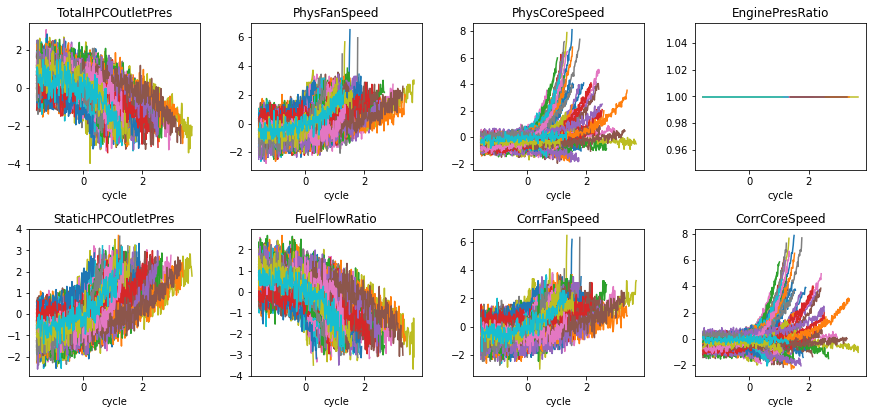

In [7]:
plot_data(train_data_normalized)

# Load the Models and Evaluation: 

In [8]:
#Load the trained model

model_FD001 = tf.keras.models.load_model('model_FD001.h5')

###  Define batches generator

In [9]:
b_generator1 = batch_generator(train_data_normalized,train_RUL,31)

### Show test instances from train datasets

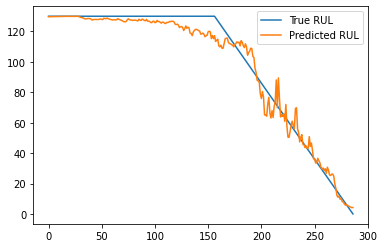

In [11]:
#For FD001
X1,Y1 = next(b_generator1)
Y_pred1 = model_FD001.predict(X1)
plt.plot(Y1,label="True RUL")
plt.plot(Y_pred1, label = "Predicted RUL")
plt.legend()

In [12]:
test_data_normalized.head()

,unit,cycle,Setting1,Setting2,Setting3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPres,...,FuelFlowRatio,CorrFanSpeed,CorrCoreSpeed,BypassRatio,BurnerFuelAirRatio,BleedEnthalpy,DemandFanSpeed,DemandCorrFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,-1.565132,1.055574,1.015652,0.0,0.999976,0.678061,-0.853530,-1.191451,0.999976,...,0.415604,-0.919819,-0.954212,-0.985083,0.999976,-0.781691,0.0,0.0,0.241938,0.774078
1,1,-1.550614,-1.230336,-1.031695,0.0,0.999976,-1.941660,-0.338129,-1.501430,0.999976,...,1.012171,-0.502683,-0.216643,-1.648994,0.999976,-0.136014,0.0,0.0,1.127156,0.941282
2,1,-1.536097,0.141210,0.333203,0.0,0.999976,-0.441820,-0.584412,-0.843697,0.999976,...,0.754562,-0.919819,-0.715695,0.052111,0.999976,-0.136014,0.0,0.0,1.459112,1.172227
3,1,-1.521579,1.924219,-0.008022,0.0,0.999976,-0.481816,-1.044359,-0.279290,0.999976,...,-0.045380,-0.641728,-0.568915,-1.345035,0.999976,-1.427367,0.0,0.0,1.016503,0.775926
4,1,-1.507061,0.644110,-0.008022,0.0,0.999976,-0.341831,-0.543637,-0.779257,0.999976,...,0.998612,-0.919819,-0.745051,-1.041076,0.999976,-2.073044,0.0,0.0,0.961177,1.138971


In [13]:
def predict_RUL (test_data1):
    test_rul = np.zeros((test_data1.shape[0]))
    Gt = batch_generator(test_data1,test_rul,31)
    RUL = []
    #_idt = testN.values[:,0]
    for i in range (100):
        test,y = next(Gt)
        p = model_FD001.predict(test)
        RUL.append(p[-1])
    RUL = np.array(RUL)
    return RUL

In [14]:
#Performance Metrics Functions

#Scoring Function
def Scoring_func(y_true,y_pred):
    '''
    :param error_arr: a list of errors for each training trajectory
    :return: standered score value for RUL
    '''
    error_arr = y_pred -  y_true 
    import math
    # print(error_arr)
    pos_error_arr = error_arr[error_arr >= 0]
    neg_error_arr = error_arr[error_arr < 0]

    score = 0
    # print(neg_error_arr)
    for error in neg_error_arr:
        score = math.exp(-(error / 13)) - 1 + score
        # print(math.exp(-(error / 13)),score,error)

    # print(pos_error_arr)
    for error in pos_error_arr:
        score = math.exp(error / 10) - 1 + score
        # print(math.exp(error / 10),score, error)
    return score

#Root Mean Square Error
def RMSE_func (P_RUL,test_RUL):
    e = P_RUL - test_RUL
    h = np.power(e,2)
    RMSE = np.sqrt(h.mean())
    return RMSE

# Mean Absolute Error
def MAE_func(y_true,y_pred):
    MAPE = mean_absolute_error(y_true,y_pred)
    return MAPE
    

### Evaluate the model

In [15]:
#Predict the RUL for the test data set
P_RUL = predict_RUL(test_data_normalized)

#Compute the metrics
RMSE = RMSE_func(P_RUL,test_RUL)
MAE = MAE_func(P_RUL,test_RUL)
SCORE = Scoring_func(P_RUL,test_RUL)

#Print the results
print('RMSE =',RMSE,"Score_fun = ",SCORE,"MAE = ",MAE)

RMSE = 14.021902466709415 Score_fun =  301.8222330868946 MAE =  10.462645916938781
